In [68]:
# Don't show output of installs
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance;
import yfinance as yf

### 1. Load Financial Data of Company

In [40]:
# Set file path for specific company data
firmData = pd.read_csv('./morningstarData/aapl_2019.csv', skiprows=2, index_col='Unnamed: 0')

In [37]:
firmData.head()

,2010-09,2011-09,2012-09,2013-09,2014-09,2015-09,2016-09,2017-09,2018-09,2019-09,TTM
Revenue USD Mil,"65,225","108,249","156,508","170,910","182,795","233,715","215,639","229,234","265,595","260,174","260,174"
Gross Margin %,39.4,40.5,43.9,37.6,38.6,40.1,39.1,38.5,38.3,37.8,37.8
Operating Income USD Mil,"18,385","33,790","55,241","48,999","52,503","71,230","60,024","61,344","70,898","63,930","63,930"
Operating Margin %,28.2,31.2,35.3,28.7,28.7,30.5,27.8,26.8,26.7,24.6,24.6
Net Income USD Mil,"14,013","25,922","41,733","37,037","39,510","53,394","45,687","48,351","59,531","55,256","55,256"


### 2. Read Metrics From Financial Data

### Functions for Metrics

In [26]:
# Return a specific stock metric of at a specific date
# Remove commas if any
def search_value(index_name, date):
    return float(firmData.loc[index_name, date].replace(",", ""))

# Return all historical data for a specific stock metric
# Remove commas if any
def historical_value(index_name):
    return firmData.loc[index_name, ].str.replace(",","").astype(float)

# TODO: Create function that acts like search_value, however dynamically uses most recent YE

##### (a) Shares Outstanding

In [27]:
# Read 2019 shares outstanding
# Note: This line might not work if the company doesn't have a Sept fiscal year end
# Note: Or, if the company does have Sept fiscal year end, might not have gone public in 2019
print(search_value('Shares Mil', '2019-09'))

# Read all historical data of shares outstanding
print(historical_value('Shares Mil'))

4649.0
2010-09    6473.0
2011-09    6557.0
2012-09    6617.0
2013-09    6522.0
2014-09    6123.0
2015-09    5793.0
2016-09    5500.0
2017-09    5252.0
2018-09    5000.0
2019-09    4649.0
TTM        4649.0
Name: Shares Mil, dtype: float64


##### (b) EPS

In [30]:
# Read 2019 EPS
print(search_value('Earnings Per Share USD', '2019-09'))

# Read all historical data of shares outstanding
print(historical_value('Earnings Per Share USD'))

11.89
2010-09     2.16
2011-09     3.95
2012-09     6.31
2013-09     5.68
2014-09     6.45
2015-09     9.22
2016-09     8.31
2017-09     9.21
2018-09    11.91
2019-09    11.89
TTM        11.89
Name: Earnings Per Share USD, dtype: float64


##### (c) Dividend Rate

In [28]:
# Read 2019 dividend rate
print(search_value('Dividends USD', '2019-09'))

# Read historical dividend rate
# Note: NaN manipulation will be introduced later
print(historical_value('Dividends USD'))

3.0
2010-09     NaN
2011-09     NaN
2012-09    0.38
2013-09    1.63
2014-09    1.81
2015-09    1.98
2016-09    2.18
2017-09    2.40
2018-09    2.72
2019-09    3.00
TTM        3.00
Name: Dividends USD, dtype: float64


##### (d) Dividend Yield

In [32]:
# Read 2019 dividend yield
print(search_value('Payout Ratio % *', '2019-09'))

# Read historical dividend yield
# Note: TTM = Trailing Twelve Months
print(historical_value('Payout Ratio % *'))

25.1
2010-09     NaN
2011-09     NaN
2012-09     NaN
2013-09    27.4
2014-09    28.5
2015-09    22.3
2016-09    24.8
2017-09    26.5
2018-09    23.7
2019-09    25.1
TTM        25.2
Name: Payout Ratio % *, dtype: float64


##### (e) Debt/Equity Ratio

In [33]:
# Read 2019 D/E Ratio
print(search_value('Debt/Equity', '2019-09'))

# Read historical D/E ratio
print(historical_value('Debt/Equity'))

1.01
2010-09     NaN
2011-09     NaN
2012-09     NaN
2013-09    0.14
2014-09    0.26
2015-09    0.45
2016-09    0.59
2017-09    0.73
2018-09    0.87
2019-09    1.01
TTM        1.01
Name: Debt/Equity, dtype: float64


##### (f) Book Value Per Share

In [34]:
# Read 2019 book value per share
print(search_value('Book Value Per Share * USD', '2019-09'))

# Read historical book value per share
print(historical_value('Book Value Per Share * USD'))

21.71
2010-09     7.45
2011-09    11.78
2012-09    16.99
2013-09    19.60
2014-09    20.62
2015-09    22.53
2016-09    23.71
2017-09    25.83
2018-09    24.17
2019-09    21.71
TTM        20.64
Name: Book Value Per Share * USD, dtype: float64


##### (g) ROE (Return on Equity)

In [35]:
# Read 2019 ROE
print(search_value('Return on Equity %', '2019-09'))

# Read historical ROE
print(historical_value('Return on Equity %'))

55.92
2010-09    35.28
2011-09    41.67
2012-09    42.84
2013-09    30.64
2014-09    33.61
2015-09    46.25
2016-09    36.90
2017-09    36.87
2018-09    49.36
2019-09    55.92
TTM        55.92
Name: Return on Equity %, dtype: float64


##### (h) Current Ratio

In [38]:
# Read 2019 current ratio
print(search_value('Current Ratio', '2019-09'))

# Read historical current ratio
print(historical_value('Current Ratio'))

1.54
2010-09    2.01
2011-09    1.61
2012-09    1.50
2013-09    1.68
2014-09    1.08
2015-09    1.11
2016-09    1.35
2017-09    1.28
2018-09    1.12
2019-09    1.54
TTM        1.54
Name: Current Ratio, dtype: float64


### 3. Get Complete Stock Price Dataframe

In [70]:
# Set ticker symbol
apple = yf.Ticker('AAPL')

# Get complete history of stock prices
apple_price = apple.history(period='max')
apple_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.10,0.10,0.10,0.10,469033600,0.0,0.0
1980-12-15,0.10,0.10,0.10,0.10,175884800,0.0,0.0
1980-12-16,0.09,0.09,0.09,0.09,105728000,0.0,0.0
1980-12-17,0.09,0.09,0.09,0.09,86441600,0.0,0.0
1980-12-18,0.09,0.09,0.09,0.09,73449600,0.0,0.0


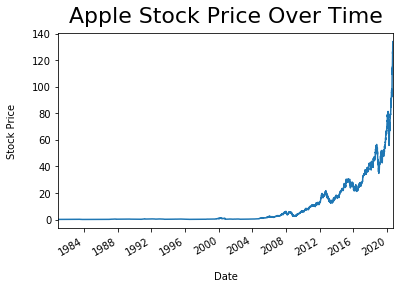

In [69]:
# Line graph of stock price over time
apple_price['Close'].plot()
plt.xlabel("Date", labelpad=15)
plt.ylabel("Stock Price", labelpad=15)
plt.title("Apple Stock Price Over Time", y=1.02, fontsize=22);

### 4. Calculate Price/Earnings (PE) & Price/Book Value (P/BV)

##### (a) Latest P/E

In [46]:
# Obtain the most recent closing price of the current stock
# TODO: Change based on current date, should just be close price of yesterday
latest_price = apple_price.loc['2020-09-11','Close']

# Obtain the most recent fiscal year end EPS
latest_eps = search_value('Earnings Per Share USD', '2019-09')

# Calculate the P/E ratio
latest_PtoE = latest_price/latest_eps
print(latest_PtoE)

9.419680403700589


##### (b) Latest P/BV

In [47]:
# Obtain the most recent closing price of the current stock
# TODO: Change based on current date, should just be close price of yesterday
latest_price = apple_price.loc['2020-09-11','Close']

# Obtain the most recent fiscal year end book value per share
latest_eps = search_value('Book Value Per Share * USD', '2019-09')

# Calculate the P/BV ratio
latest_PtoBV = latest_price/latest_eps
print(latest_PtoBV)

5.158912943344081


### 5. Formatting to One Concise Dataframe

##### (a) Transpose Company Dataframe
For the convenience of calculation, we want to transpose the dataframe. Such that the time would be rows and metrics would be columns.

In [48]:
# Transpose dataframe
firmData = firmData.T
firmData.head()

,Revenue USD Mil,Gross Margin %,Operating Income USD Mil,Operating Margin %,Net Income USD Mil,Earnings Per Share USD,Dividends USD,Payout Ratio % *,Shares Mil,Book Value Per Share * USD,...,Key Ratios -> Efficiency Ratios,Efficiency,Days Sales Outstanding,Days Inventory,Payables Period,Cash Conversion Cycle,Receivables Turnover,Inventory Turnover,Fixed Assets Turnover,Asset Turnover
2010-09,"65,225",39.4,"18,385",28.2,"14,013",2.16,NaN,NaN,"6,473",7.45,...,NaN,2010-09,24.82,6.95,81.30,-49.53,14.71,52.51,16.89,1.06
2011-09,"108,249",40.5,"33,790",31.2,"25,922",3.95,NaN,NaN,"6,557",11.78,...,NaN,2011-09,18.34,5.17,75.48,-51.96,19.90,70.53,17.26,1.13
2012-09,"156,508",43.9,"55,241",35.3,"41,733",6.31,0.38,NaN,"6,617",16.99,...,NaN,2012-09,19.01,3.26,74.38,-52.13,19.20,112.12,13.48,1.07
2013-09,"170,910",37.6,"48,999",28.7,"37,037",5.68,1.63,27.4,"6,522",19.60,...,NaN,2013-09,25.66,4.37,74.54,-44.50,14.22,83.45,10.67,0.89
2014-09,"182,795",38.6,"52,503",28.7,"39,510",6.45,1.81,28.5,"6,123",20.62,...,NaN,2014-09,30.51,6.30,85.45,-48.64,11.96,57.94,9.82,0.83


##### (b) Extract metrics we need
The financial data contains a lot of metrics, we are not going to use most of them. So, let's create a smaller dataframe with whatever metrics we will use.

In [49]:
col_names = ['Shares Mil','Earnings Per Share USD','Dividends USD',
            'Payout Ratio % *', 'Debt/Equity', 'Book Value Per Share * USD',
            'Return on Equity %', 'Current Ratio']
firm_df = firmData[col_names]
firm_df.head()

,Shares Mil,Earnings Per Share USD,Dividends USD,Payout Ratio % *,Debt/Equity,Book Value Per Share * USD,Return on Equity %,Current Ratio
2010-09,"6,473",2.16,NaN,NaN,NaN,7.45,35.28,2.01
2011-09,"6,557",3.95,NaN,NaN,NaN,11.78,41.67,1.61
2012-09,"6,617",6.31,0.38,NaN,NaN,16.99,42.84,1.50
2013-09,"6,522",5.68,1.63,27.4,0.14,19.60,30.64,1.68
2014-09,"6,123",6.45,1.81,28.5,0.26,20.62,33.61,1.08


##### (c) Rename Columns

Now we have a concise dataframe `firm_df`, which is easier to use. Now let's get rid of the column special symbols and unify the column name style by renaming them.

In [51]:
new_col = ['shares_outstanding', 'earning_per_share', 'dividend_rate', 
           'dividend_yield', 'debt_to_equity', 'book_value_per_share',
          'return_on_equity', 'current_ratio']
firm_df.columns = new_col
firm_df.head()

,shares_outstanding,earning_per_share,dividend_rate,dividend_yield,debt_to_equity,book_value_per_share,return_on_equity,current_ratio
2010-09,"6,473",2.16,NaN,NaN,NaN,7.45,35.28,2.01
2011-09,"6,557",3.95,NaN,NaN,NaN,11.78,41.67,1.61
2012-09,"6,617",6.31,0.38,NaN,NaN,16.99,42.84,1.50
2013-09,"6,522",5.68,1.63,27.4,0.14,19.60,30.64,1.68
2014-09,"6,123",6.45,1.81,28.5,0.26,20.62,33.61,1.08


Now the dataframe looks great! Attention, do not get the order of new column (`new_col`) names wrong. It should be in exactly the same order as current column.